 # Data Wrangling with Pandas




Now that we have been exposed to the basic functionality of Pandas, lets explore some more advanced features that will be useful when addressing more complex data management tasks.



As most statisticians/data analysts will admit, often the lion's share of the time spent implementing an analysis is devoted to preparing the data itself, rather than to coding or running a particular model that uses the data. This is where Pandas and  Python's standard library are beneficial, providing high-level, flexible, and efficient tools for manipulating your data as needed.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime
# Set some Pandas options
pd.options.display.notebook_repr_html = True
pd.options.display.max_columns=20
pd.options.display.max_rows=25

## Date/Time data handling

Date and time data are inherently problematic. There are an unequal number of days in every month, an unequal number of days in a year (due to leap years), and time zones that vary over space. Yet information about time is essential in many analyses, particularly in the case of time series analysis.

The `datetime` built-in library handles temporal information down to the nanosecond.

In [2]:
now = datetime.now()
now

datetime.datetime(2024, 12, 28, 10, 14, 4, 204418)

In [3]:
now.day

28

In [4]:
now.weekday()

5

In [5]:
now.time()

datetime.time(10, 14, 4, 204418)

In addition to `datetime` there are simpler objects for date and time information only, respectively.

In [6]:
from datetime import date, time

In [7]:
time(3, 24)

datetime.time(3, 24)

In [8]:
date(1970, 8, 3)

datetime.date(1970, 8, 3)

In [9]:
#help(date)

Having a custom data type for dates and times is convenient because we can perform operations on them easily. For example, we may want to calculate the difference between two times:

In [10]:
my_age = now - datetime(1989,11,11)
my_age

datetime.timedelta(days=12831, seconds=36844, microseconds=204418)

In [11]:
my_age.days/365.25

35.12936344969199

# Data Analysis Example 1 - Ship AIS System


In this section, we will manipulate data collected from ocean-going vessels on the eastern seaboard. Vessel operations are monitored using the **Automatic Identification System (AIS)**, a safety at sea navigation technology which vessels are required to maintain.

- AIS uses transponders to transmit very high frequency (VHF) radio signals containing static information including ship name, call sign, and country of origin, as well as dynamic information unique to a particular voyage such as vessel location, heading, and speed. 


<center><img src="https://www.easyais.com/wp-content/uploads/2014/04/automatic-identification-system.png" class="center" alt="AIS" style="width: 700px;"/></center>


<sub>The International Maritime Organization’s (IMO) International Convention for the Safety of Life at Sea requires functioning AIS capabilities on all vessels 300 gross tons or greater and the US Coast Guard requires AIS on nearly all vessels sailing in U.S. waters. The Coast Guard has established a national network of AIS receivers that provides coverage of nearly all U.S. waters. AIS signals are transmitted several times each minute and the network is capable of handling thousands of reports per minute and updates as often as every two seconds. Therefore, a typical voyage in our study might include the transmission of hundreds or thousands of AIS encoded signals. This provides a rich source of spatial data that includes both spatial and temporal information.</sub>

For our purposes, we will use summarized data that describes the transit of a given vessel through a particular administrative area. The data includes the start and end time of the transit segment, as well as information about the speed of the vessel, how far it traveled, etc.

In [12]:
segments = pd.read_csv("data/AIS/transit_segments.csv")
segments

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35
...,...,...,...,...,...,...,...,...,...,...,...
262521,999999999,Triple Attraction,3,1,5.3,20.0,19.6,20.4,100.0,6/15/10 12:49,6/15/10 13:05
262522,999999999,Triple Attraction,4,1,18.7,19.2,18.4,19.9,100.0,6/15/10 21:32,6/15/10 22:29
262523,999999999,Triple Attraction,6,1,17.4,17.0,14.7,18.4,100.0,6/17/10 19:16,6/17/10 20:17
262524,999999999,Triple Attraction,7,1,31.5,14.2,13.4,15.1,100.0,6/18/10 2:52,6/18/10 5:03


For example, we might be interested in the distribution of transit lengths, so we can plot them as a histogram:

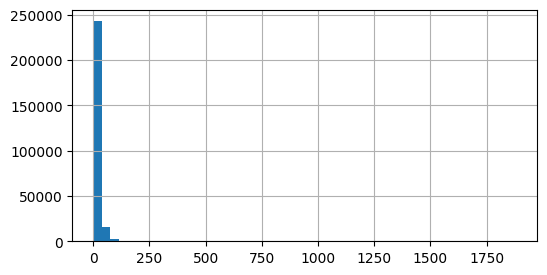

In [13]:
fig = plt.figure(figsize = (6,3))
ax = fig.gca()
segments['seg_length'].hist(bins=50, ax=ax);

In [14]:
segments['seg_length'].max()

1882.0

In [15]:
segments['seg_length'].min()

1.0

In [16]:
segments[segments['seg_length']==1882.0]

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
181047,367525000,Padre Island,1017,1,1882.0,5.5,0.1,13.7,30.7,2/6/11 0:10,2/23/11 19:04


Though most of the transits appear to be short, there are a few longer distances that make the plot difficult to read. This is where a **transformation** is useful:

We will use $log()$ transform

In [17]:
#help(np.log)

In [18]:
print(np.log(1882),np.log(1))

7.540090320145325 0.0


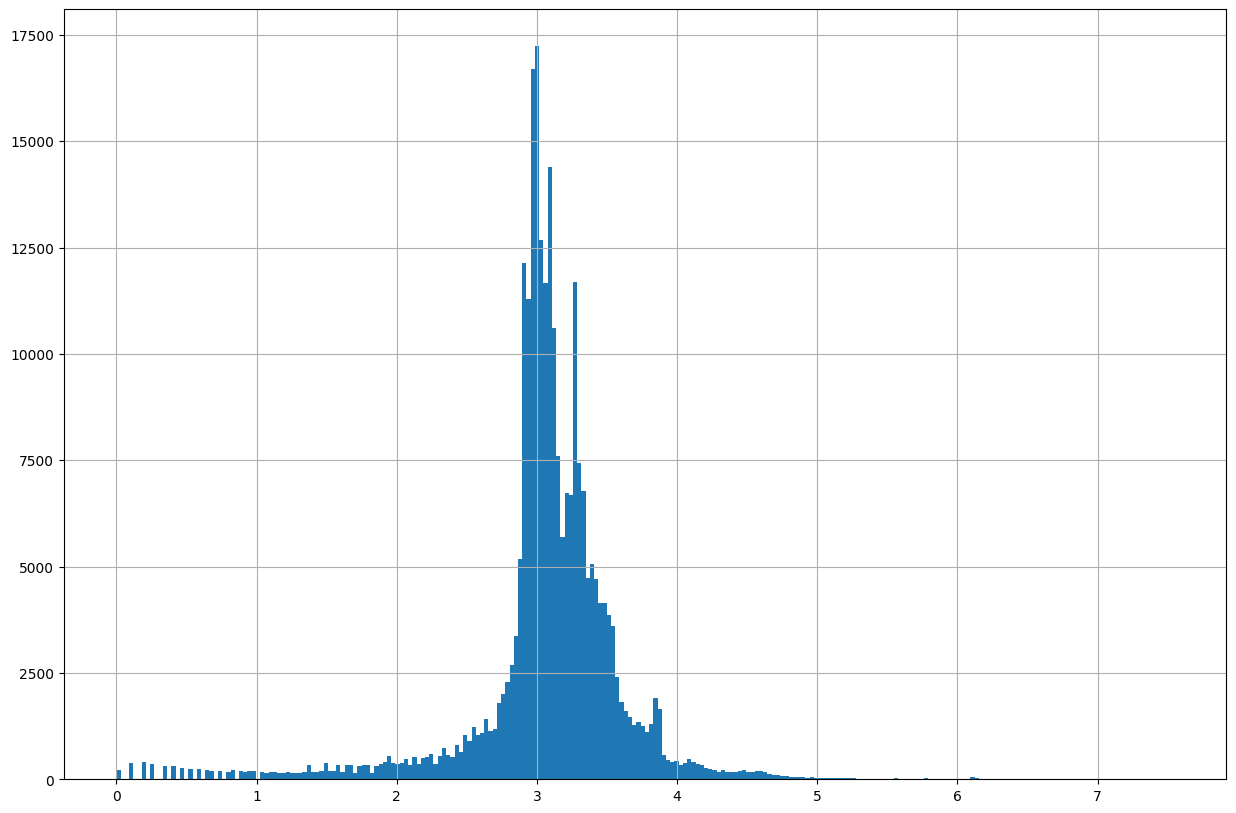

In [19]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
segments['seg_length'].apply(np.log).hist(bins=250, ax=ax);

We can see that although there are date/time fields in the dataset, they are not in any specialized format, such as `datetime`.

In [20]:
segments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262526 entries, 0 to 262525
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   mmsi        262526 non-null  int64  
 1   name        262526 non-null  object 
 2   transit     262526 non-null  int64  
 3   segment     262526 non-null  int64  
 4   seg_length  262526 non-null  float64
 5   avg_sog     262526 non-null  float64
 6   min_sog     262526 non-null  float64
 7   max_sog     262526 non-null  float64
 8   pdgt10      262526 non-null  float64
 9   st_time     262526 non-null  object 
 10  end_time    262526 non-null  object 
dtypes: float64(5), int64(3), object(3)
memory usage: 22.0+ MB


In [21]:
segments['st_time'].dtype

dtype('O')

Our first order of business will be to convert these data to `datetime`. The `strptime` method parses a string representation of a date and/or time field, according to the expected format of this information.

In [22]:
segments['st_time'].loc[0]

'2/10/09 16:03'

In [23]:
datetime.strptime(segments['st_time'].loc[0], '%m/%d/%y %H:%M')

datetime.datetime(2009, 2, 10, 16, 3)

The `dateutil` package includes a parser that attempts to detect the format of the date strings, and convert them automatically.

In [24]:
from dateutil.parser import parse

In [25]:
parse(segments['st_time'].loc[0])

datetime.datetime(2009, 2, 10, 16, 3)

We can convert all the dates in a particular column by using the `apply` method.

In [26]:
%time
segments['st_time'].apply(lambda d: datetime.strptime(d, '%m/%d/%y %H:%M'))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


0        2009-02-10 16:03:00
1        2009-04-06 14:31:00
2        2009-04-06 14:36:00
3        2009-04-10 17:58:00
4        2009-04-10 17:59:00
                 ...        
262521   2010-06-15 12:49:00
262522   2010-06-15 21:32:00
262523   2010-06-17 19:16:00
262524   2010-06-18 02:52:00
262525   2010-06-18 10:19:00
Name: st_time, Length: 262526, dtype: datetime64[ns]

In [27]:
%time 
s1 = pd.DataFrame()
s1['dt'] = segments['st_time'].apply(lambda d: datetime.strptime(d, '%m/%d/%y %H:%M'))
s1
s1['dt'].dtype

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


dtype('<M8[ns]')

As a convenience, Pandas has a `to_datetime` method that will parse and convert an entire Series of formatted strings into `datetime` objects. The errors='coerce' parameter specifies that any parsing errors should be converted to NaT (Not a Time), which means that if pandas encounters any invalid datetime strings, it will return NaT instead of raising an error.

In [28]:
%time
pd.to_datetime(segments['st_time'], format='%m/%d/%y %H:%M', errors = 'coerce')

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.48 µs


0        2009-02-10 16:03:00
1        2009-04-06 14:31:00
2        2009-04-06 14:36:00
3        2009-04-10 17:58:00
4        2009-04-10 17:59:00
                 ...        
262521   2010-06-15 12:49:00
262522   2010-06-15 21:32:00
262523   2010-06-17 19:16:00
262524   2010-06-18 02:52:00
262525   2010-06-18 10:19:00
Name: st_time, Length: 262526, dtype: datetime64[ns]

In [29]:
segments['st_time'].dtype

dtype('O')

Pandas also has a custom NA value for missing datetime objects, `NaT`.

In [30]:
pd.to_datetime([None])

DatetimeIndex(['NaT'], dtype='datetime64[ns]', freq=None)

In [31]:
pd.to_numeric([None])

array([nan])

Also, if `to_datetime()` has problems parsing any particular date/time format, you can pass the spec in using the `format=` argument.

## Merging and Joining DataFrame objects

Now that we have the vessel transit information as we need it, we may want a little more information regarding the vessels themselves. 


- In the `data/AIS` folder there is a second table **`vessel_information`** that contains information about each of the ships that traveled the segments in the `segments` table.

In [32]:
vessels = pd.read_csv("data/AIS/vessel_information.csv", index_col='mmsi')
vessels.head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown


- so **`segments`** dataframe (transit_segments.csv) contains length of segments
- and **`vessels`** dataframe (vessel_information.csv) contains vessel information

In [33]:
vessels.columns

Index(['num_names', 'names', 'sov', 'flag', 'flag_type', 'num_loas', 'loa',
       'max_loa', 'num_types', 'type'],
      dtype='object')

In [34]:
[v for v in vessels['type'].unique() if v.find('/')==-1]

['Unknown',
 'Other',
 'Tug',
 'Towing',
 'Pleasure',
 'Cargo',
 'WIG',
 'Fishing',
 'BigTow',
 'MilOps',
 'Tanker',
 'Passenger',
 'SAR',
 'Sailing',
 'Reserved',
 'Law',
 'Dredging',
 'AntiPol',
 'Pilot',
 'HSC',
 'Diving',
 'Resol-18',
 'Tender',
 'Spare',
 'Medical']

In [35]:
[v for v in vessels.type.unique() if v.find('/')!=-1]

['Dredging/MilOps/Reserved/Towing',
 'Pleasure/Tug',
 'Tanker/Unknown',
 'Fishing/Pleasure',
 'MilOps/Unknown',
 'BigTow/Cargo/Diving/Dredging/Fishing/MilOps/Other/Passenger/Pilot/Pleasure/Sailing/Tanker/Towing/Tug',
 'Other/Towing',
 'Fishing/Other/Towing',
 'Towing/Tug',
 'Passenger/Pleasure/Sailing',
 'BigTow/Tug',
 'Cargo/Fishing/MilOps/Other/Pleasure/Sailing/Spare/Tender/Towing',
 'Passenger/Pleasure',
 'AntiPol/BigTow/Fishing/Other/Passenger/Pilot/Pleasure/Resol-18/Sailing/Towing/Tug',
 'Cargo/Unknown',
 'Reserved/Tanker',
 'Cargo/Reserved',
 'Cargo/Other',
 'Other/Tanker',
 'Pleasure/Sailing',
 'HSC/Pleasure',
 'Passenger/Reserved',
 'Sailing/WIG',
 'Cargo/Tanker',
 'Dredging/Tanker',
 'Cargo/Pilot',
 'BigTow/Pleasure/Reserved/Towing/Tug',
 'Dredging/Other/Unknown',
 'Other/Passenger',
 'Cargo/Other/Unknown',
 'Fishing/Other',
 'Law/Unknown',
 'Cargo/WIG',
 'Cargo/Passenger',
 'Sailing/Spare',
 'Passenger/Tanker',
 'Passenger/Unknown',
 'Fishing/Passenger',
 'BigTow/Towing/Unkno

Types of vessels in our data

In [36]:
vessels['type'].value_counts()

type
Cargo                      5622
Tanker                     2440
Pleasure                    601
Tug                         221
Sailing                     205
                           ... 
AntiPol/Other                 1
Fishing/Law                   1
Cargo/Other/Towing            1
Cargo/Fishing                 1
Fishing/Reserved/Towing       1
Name: count, Length: 206, dtype: int64

The challenge, however, is that several ships have travelled multiple segments,
- So there is not a one-to-one relationship between the rows of the two tables. 
    - The table of vessel information has a ***one-to-many*** relationship with the segments.

In Pandas, we can combine tables according to the value of one or more ***keys*** that are used to identify rows, much like an index. Using a trivial example:

In [37]:
df1 = pd.DataFrame(dict(id=range(4), age=np.random.randint(18, 31, size=4)))
df2 = pd.DataFrame(dict(id=range(6), score=np.random.random(size=6)))

print(df1)
print("\n")
print(df2)

   id  age
0   0   24
1   1   24
2   2   20
3   3   28


   id     score
0   0  0.037394
1   1  0.115432
2   2  0.299179
3   3  0.901781
4   4  0.041917
5   5  0.598100


### Types of joins in pandas

#### 1. Merge
- **Purpose**: Combines two DataFrames based on one or more common columns or indexes.
- **Use Case**: Flexible and customizable for column-based merging.

##### Key Features of `merge`:
1. Works on **specific columns** or **indexes** as keys.
2. Requires specifying the column(s) to merge on (`on`, `left_on`, `right_on`).
3. Supports different types of joins: `inner`, `outer`, `left`, `right`.
4. Can handle DataFrames with different column names for join keys using `left_on` and `right_on`.


#### 2. Join
- **Purpose**: Combines two DataFrames based on their **indexes** (default) or specified columns.
- **Use Case**: Simplified operation when working with indexes for alignment.

##### Key Features of `join`:
1. Joins DataFrames based on their **indexes** by default.
2. Can align on a column instead of an index by using the `on` parameter.
3. Supports join types: `inner`, `outer`, `left`, `right`.
4. Simplifies joining **multiple DataFrames**.



### Inner Join

Join on matching values in both dataframes

In [38]:
df1

,id,age
0,0,24
1,1,24
2,2,20
3,3,28


In [39]:
df2

,id,score
0,0,0.037394
1,1,0.115432
2,2,0.299179
3,3,0.901781
4,4,0.041917
5,5,0.598100


In [40]:
pd.merge(df1, df2)

,id,age,score
0,0,24,0.037394
1,1,24,0.115432
2,2,20,0.299179
3,3,28,0.901781


In [41]:
df1.join(df2.set_index('id'), on='id')

,id,age,score
0,0,24,0.037394
1,1,24,0.115432
2,2,20,0.299179
3,3,28,0.901781


Notice that without any information about which column to use as a key, Pandas did the right thing and used the `id` column in both tables. 
- Unless specified otherwise, `merge` will used any common column names as keys for merging the tables. 

Notice also that `id=3` from `df1` was omitted from the merged table. 
- This is because, by default, `merge` performs an **inner join** on the tables, meaning that the merged table represents an intersection of the two tables.

### Outer Join

The **outer join** above yields the union of the two tables, so all rows are represented, 
- with missing values inserted as appropriate. 

In [42]:
pd.merge(df1, df2, how='outer')

,id,age,score
0,0,24.0,0.037394
1,1,24.0,0.115432
2,2,20.0,0.299179
3,3,28.0,0.901781
4,4,NaN,0.041917
5,5,NaN,0.598100


In [43]:
df1.join(df2.set_index('id'), on='id', how='outer')

,id,age,score
0.0,0,24.0,0.037394
1.0,1,24.0,0.115432
2.0,2,20.0,0.299179
3.0,3,28.0,0.901781
NaN,4,NaN,0.041917
NaN,5,NaN,0.598100


In [44]:
pd.merge(df1, df2, how='left')

,id,age,score
0,0,24,0.037394
1,1,24,0.115432
2,2,20,0.299179
3,3,28,0.901781


In [45]:
df1.join(df2.set_index('id'), on='id', how='left')

,id,age,score
0,0,24,0.037394
1,1,24,0.115432
2,2,20,0.299179
3,3,28,0.901781


In [46]:
pd.merge(df1, df2, how='right')

,id,age,score
0,0,24.0,0.037394
1,1,24.0,0.115432
2,2,20.0,0.299179
3,3,28.0,0.901781
4,4,NaN,0.041917
5,5,NaN,0.598100


In [47]:
df1.join(df2.set_index('id'), on='id', how='right')

,id,age,score
0.0,0,24.0,0.037394
1.0,1,24.0,0.115432
2.0,2,20.0,0.299179
3.0,3,28.0,0.901781
NaN,4,NaN,0.041917
NaN,5,NaN,0.598100


In [48]:
df2 = df2.set_index('id')
df2

,score
id,
0,0.037394
1,0.115432
2,0.299179
3,0.901781
4,0.041917
5,0.598100


In [49]:
pd.merge(df2, df1, left_index=True, right_on='id',how = 'outer')

,score,id,age
0.0,0.037394,0,24.0
1.0,0.115432,1,24.0
2.0,0.299179,2,20.0
3.0,0.901781,3,28.0
NaN,0.041917,4,NaN
NaN,0.598100,5,NaN


##### Lets get back to our ships :)

Looking at the two datasets that we wish to merge:

In [50]:
segments.head(1)

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27


In [51]:
vessels.head(1)

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing


We see that there is a `mmsi` value (a vessel identifier) in each table, but it is used as an index for the `vessels` table. In this case, we have to specify to join on the index for this table, and on the `mmsi` column for the other.

- One can also perform **right** and **left** joins to include all rows of the right or left table (*i.e.* first or second argument to `merge`), but not necessarily the other.

In [52]:
segments_merged = pd.merge(vessels, segments, left_index=True, right_on='mmsi')

In [53]:
segments_merged

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type,...,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262521,1,Triple Attraction,N,Unknown,Unknown,1,30.0,30.0,1,Pleasure,...,Triple Attraction,3,1,5.3,20.0,19.6,20.4,100.0,6/15/10 12:49,6/15/10 13:05
262522,1,Triple Attraction,N,Unknown,Unknown,1,30.0,30.0,1,Pleasure,...,Triple Attraction,4,1,18.7,19.2,18.4,19.9,100.0,6/15/10 21:32,6/15/10 22:29
262523,1,Triple Attraction,N,Unknown,Unknown,1,30.0,30.0,1,Pleasure,...,Triple Attraction,6,1,17.4,17.0,14.7,18.4,100.0,6/17/10 19:16,6/17/10 20:17
262524,1,Triple Attraction,N,Unknown,Unknown,1,30.0,30.0,1,Pleasure,...,Triple Attraction,7,1,31.5,14.2,13.4,15.1,100.0,6/18/10 2:52,6/18/10 5:03


In this case, the default inner join is suitable; we are not interested in observations from either table that do not have corresponding entries in the other. 

Notice that `mmsi` field that was an index on the `vessels` table is no longer an index on the merged table.

Here, we used the `merge` function to perform the merge; we could also have used the `merge` method for either of the tables:

In [54]:
vessels.merge(segments, left_index=True, right_on='mmsi').head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type,...,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35


In [55]:
vessels.reset_index().merge(segments, left_on = 'mmsi', right_on='mmsi').head()

,mmsi,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,...,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,...,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,...,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,...,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,...,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,...,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35


Occasionally, there will be fields with the same in both tables that we do not wish to use to join the tables; they may contain different information, despite having the same name. In this case, Pandas will by default append suffixes `_x` and `_y` to the columns to uniquely identify them.

In [56]:
segments['type'] = 'foo'
pd.merge(vessels, segments, left_index=True, right_on='mmsi').head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type_x,...,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time,type_y
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27,foo
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20,foo
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55,foo
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34,foo
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35,foo


This behavior can be overridden by specifying a `suffixes` argument, containing a list of the suffixes to be used for the columns of the left and right columns, respectively.

## Concatenation

A common data manipulation is appending rows or columns to a dataset that already conform to the dimensions of the exsiting rows or colums, respectively. In NumPy, this is done either with `concatenate` or the convenience functions `c_` and `r_`:

In [57]:
np.concatenate([np.random.random(5), np.random.random(5)])

array([0.04714394, 0.11422886, 0.08105987, 0.49772209, 0.51751995,
       0.97126694, 0.09604829, 0.944937  , 0.82141268, 0.3340802 ])

In [58]:
np.r_[np.random.random(5), np.random.random(5)]

array([0.12708135, 0.10207492, 0.85476293, 0.6409107 , 0.44937554,
       0.44682371, 0.2775523 , 0.96220146, 0.72356301, 0.17679067])

In [59]:
np.r_[np.random.random(5), np.random.random(6)]

array([0.0828051 , 0.09713131, 0.80063229, 0.82865999, 0.85046948,
       0.91539479, 0.60542738, 0.66995621, 0.02798956, 0.66755094,
       0.25696189])

In [60]:
np.c_[np.random.random(5), np.random.random(5)]

array([[0.02201974, 0.59901676],
       [0.54332003, 0.86066509],
       [0.45391472, 0.64362936],
       [0.21636322, 0.08895277],
       [0.74776223, 0.54588992]])

In [61]:
np.c_[np.random.random(5), np.random.random(6)]

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 5 and the array at index 1 has size 6

In [62]:
# Sample DataFrames
df1 = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

df2 = pd.DataFrame({
    'A': [7, 8, 9],
    'B': ['10a', '11a', '12a']
})

# Convert DataFrames to NumPy arrays
array1 = df1.to_numpy()
print(array1)
array2 = df2.to_numpy()

# Concatenate the arrays
concatenated_array = np.concatenate((array1, array2), axis=0)  # Concatenating along the rows

# Convert the concatenated array back to a DataFrame
concatenated_df = pd.DataFrame(concatenated_array, columns=df1.columns)

print(concatenated_df)
print(concatenated_df.info())

[[1 4]
 [2 5]
 [3 6]]
   A    B
0  1    4
1  2    5
2  3    6
3  7  10a
4  8  11a
5  9  12a
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       6 non-null      object
 1   B       6 non-null      object
dtypes: object(2)
memory usage: 228.0+ bytes
None


This operation is also called *binding* or *stacking*.

With Pandas' indexed data structures, there are additional considerations as the overlap in index values between two data structures affects how they are concatenate.

# Data Analysis Example 2 - Patient Microbiome

Lets import two microbiome datasets, each consisting of counts of microorganiams from a particular patient. We will use the first column of each dataset as the index.

In [63]:
mb1 = pd.read_excel('data/microbiome/MID1.xls', 'Sheet 1', index_col=0, header=None)
mb2 = pd.read_excel('data/microbiome/MID2.xls', 'Sheet 1', index_col=0, header=None)
mb1.shape, mb2.shape

((272, 1), (288, 1))

In [64]:
mb1.head()

,1
0,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7


In [65]:
mb2.head()

,1
0,
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",14
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",23
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",1
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",2


Let's give the index and columns meaningful labels:

In [66]:
mb1.columns = mb2.columns = ['Count']

In [67]:
mb1.index.name = mb2.index.name = 'Taxon'

In [68]:
mb1.head()

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7


The index of these data is the unique biological classification of each organism, beginning with *domain*, *phylum*, *class*, and for some organisms, going all the way down to the genus level.

![classification](http://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Biological_classification_L_Pengo_vflip.svg/150px-Biological_classification_L_Pengo_vflip.svg.png)

In [69]:
mb1.index[:3]

Index(['Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera',
       'Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus',
       'Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus'],
      dtype='object', name='Taxon')

In [70]:
mb1.index.is_unique

True

If we concatenate along `axis=0` (the default), we will obtain another data frame with the the rows concatenated:

In [71]:
df_concat = pd.concat([mb1, mb2], axis=0)
df_concat.shape

(560, 1)

In [72]:
df_concat

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7
...,...
"Bacteria ""Thermotogae"" Thermotogae Thermotogales Thermotogaceae Geotoga",15
"Bacteria ""Thermotogae"" Thermotogae Thermotogales Thermotogaceae Kosmotoga",22
Bacteria Cyanobacteria Cyanobacteria Chloroplast Chlorarachniophyceae,1


However, the index is no longer unique, due to overlap between the two DataFrames.

In [73]:
df_concat.index.is_unique

False

Concatenating along `axis=1` will concatenate column-wise, but respecting the indices of the two DataFrames.

In [74]:
df_concat_1 = pd.concat([mb1, mb2], axis=1)
df_concat_1.shape

(438, 2)

In [75]:
print(mb1.shape, mb2.shape)

(272, 1) (288, 1)


In [76]:
df_concat_1

,Count,Count
Taxon,,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0,23.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2.0,2.0
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3.0,10.0
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3.0,9.0
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7.0,9.0
...,...,...
"Bacteria ""Proteobacteria"" Gammaproteobacteria Oceanospirillales Oceanospirillales_incertae_sedis Spongiispira",NaN,1.0
"Bacteria ""Proteobacteria"" Gammaproteobacteria Thiotrichales Piscirickettsiaceae Hydrogenovibrio",NaN,9.0
"Bacteria ""Proteobacteria"" Gammaproteobacteria Thiotrichales Piscirickettsiaceae Sulfurivirga",NaN,1.0


In [77]:
df_concat_1.index.is_unique

True

In [78]:
df_concat_1.values[:5]

array([[ 7., 23.],
       [ 2.,  2.],
       [ 3., 10.],
       [ 3.,  9.],
       [ 7.,  9.]])

If we are only interested in taxon that are included in both DataFrames, we can specify a `join=inner` argument.

In [79]:
pd.concat([mb1, mb2], axis=1, join='inner')

,Count,Count
Taxon,,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7,23
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2,2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3,10
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3,9
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7,9
...,...,...
"Bacteria ""Thermodesulfobacteria"" Thermodesulfobacteria Thermodesulfobacteriales Thermodesulfobacteriaceae Caldimicrobium",1,1
"Bacteria ""Thermotogae"" Thermotogae Thermotogales Thermotogaceae Geotoga",7,15
"Bacteria ""Thermotogae"" Thermotogae Thermotogales Thermotogaceae Kosmotoga",9,22


In [80]:
pd.concat([mb1, mb2], axis=1, join='outer')

,Count,Count
Taxon,,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0,23.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2.0,2.0
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3.0,10.0
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3.0,9.0
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7.0,9.0
...,...,...
"Bacteria ""Proteobacteria"" Gammaproteobacteria Oceanospirillales Oceanospirillales_incertae_sedis Spongiispira",NaN,1.0
"Bacteria ""Proteobacteria"" Gammaproteobacteria Thiotrichales Piscirickettsiaceae Hydrogenovibrio",NaN,9.0
"Bacteria ""Proteobacteria"" Gammaproteobacteria Thiotrichales Piscirickettsiaceae Sulfurivirga",NaN,1.0


If we wanted to use the second table to fill values absent from the first table, we could use `combine_first`.

In [81]:
mb1.combine_first(mb2)

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",14
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",1
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",2
...,...
"Bacteria ""Verrucomicrobia"" Opitutae Opitutales Opitutaceae Alterococcus",1
Bacteria Cyanobacteria Cyanobacteria Chloroplast Bangiophyceae,2
Bacteria Cyanobacteria Cyanobacteria Chloroplast Chlorarachniophyceae,85


We can also create a hierarchical index based on keys identifying the original tables.

In [82]:
pd.concat([mb1, mb2], keys=['patient1', 'patient2'])

Count
         Taxon                                                    
patient1 Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7
         Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2
         Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3
         Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3
         Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7
...                                                            ...
patient2 Bacteria "Thermotogae" Thermotogae Thermotogale...     15
         Bacteria "Thermotogae" Thermotogae Thermotogale...     22
         Bacteria Cyanobacteria Cyanobacteria  Chloropla...      1
         Bacteria Cyanobacteria Cyanobacteria  Chloropla...      2
         Bacteria TM7    TM7_genera_incertae_sedis               2

[560 rows x 1 columns]

In [83]:
pd.concat([mb1, mb2], keys=['patient1', 'patient2']).index.is_unique

True

Alternatively, you can pass keys to the concatenation by supplying the DataFrames (or Series) as a dict.

In [84]:
pd.concat(dict(patient1=mb1, patient2=mb2), axis=1).head()

,patient1,patient2
,Count,Count
Taxon,,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0,23.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2.0,2.0
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3.0,10.0
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3.0,9.0
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7.0,9.0


If you want `concat` to work like `numpy.concatanate`, you may provide the `ignore_index=True` argument.

# Data Analysis Example 3 - Cervical Dystonia in Patients

This dataset in from Table 6.9 of [Statistical Methods for the Analysis of Repeated Measurements](http://www.amazon.com/Statistical-Methods-Analysis-Repeated-Measurements/dp/0387953701) by Charles S. Davis, pp. 161-163 (Springer, 2002). These data are from a multicenter, randomized controlled trial of botulinum toxin type B (BotB) in patients with cervical dystonia from nine U.S. sites.

* Randomized to placebo (N=36), 5000 units of BotB (N=36), 10,000 units of BotB (N=37)
* Response variable: total score on Toronto Western Spasmodic Torticollis Rating Scale (TWSTRS), measuring severity, pain, and disability of cervical dystonia (high scores mean more impairment)
* TWSTRS measured at baseline (week 0) and weeks 2, 4, 8, 12, 16 after treatment began

In [85]:
cdystonia = pd.read_csv("data/cdystonia.csv", index_col=None)
cdystonia

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39
...,...,...,...,...,...,...,...,...,...
626,109,1,0,9,11,5000U,57,M,53
627,109,2,2,9,11,5000U,57,M,38
628,109,4,8,9,11,5000U,57,M,33
629,109,5,12,9,11,5000U,57,M,36


This dataset includes repeated measurements of the same individuals (longitudinal data). Its possible to present such information in (at least) two ways: 

- showing each repeated measurement in their own row, or 

- in multiple columns representing multiple measurements.


## Reshaping DataFrame objects

In the context of a single DataFrame, we are often interested in re-arranging the layout of our data. 

The `stack` method rotates the data frame so that columns are represented in rows:

In [86]:
stacked = cdystonia.stack()
stacked

0    patient        1
     obs            1
     week           0
     site           1
     id             1
                ...  
630  id            11
     treat      5000U
     age           57
     sex            M
     twstrs        51
Length: 5679, dtype: object

To complement this, `unstack` pivots from rows back to columns.

In [87]:
stacked.unstack().head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


For this dataset, it makes sense to create a hierarchical index based on the patient and observation:

In [88]:
cdystonia2 = cdystonia.set_index(['patient','obs'])
cdystonia2

week  site  id  treat  age sex  twstrs
patient obs                                        
1       1       0     1   1  5000U   65   F      32
        2       2     1   1  5000U   65   F      30
        3       4     1   1  5000U   65   F      24
        4       8     1   1  5000U   65   F      37
        5      12     1   1  5000U   65   F      39
...           ...   ...  ..    ...  ...  ..     ...
109     1       0     9  11  5000U   57   M      53
        2       2     9  11  5000U   57   M      38
        4       8     9  11  5000U   57   M      33
        5      12     9  11  5000U   57   M      36
        6      16     9  11  5000U   57   M      51

[631 rows x 7 columns]

In [89]:
cdystonia2.index.is_unique

True

If we want to transform this data so that repeated measurements are in columns, we can `unstack` the `twstrs` measurements according to `obs`.

- This is a **wide** format dataframe

In [90]:
twstrs_wide = cdystonia2['twstrs'].unstack('obs')
twstrs_wide

obs,1,2,3,4,5,6
patient,,,,,,
1,32.0,30.0,24.0,37.0,39.0,36.0
2,60.0,26.0,27.0,41.0,65.0,67.0
3,44.0,20.0,23.0,26.0,35.0,35.0
4,53.0,61.0,64.0,62.0,NaN,NaN
5,53.0,35.0,48.0,49.0,41.0,51.0
...,...,...,...,...,...,...
105,45.0,46.0,33.0,44.0,46.0,48.0
106,67.0,63.0,71.0,66.0,68.0,71.0
107,57.0,NaN,36.0,23.0,NaN,52.0


In [91]:
cdystonia[['patient','site','id','treat','age','sex']].drop_duplicates()

,patient,site,id,treat,age,sex
0,1,1,1,5000U,65,F
6,2,1,2,10000U,70,F
12,3,1,3,5000U,64,F
18,4,1,4,Placebo,59,F
22,5,1,5,10000U,76,F
...,...,...,...,...,...,...
604,105,9,7,Placebo,79,F
610,106,9,8,5000U,43,M
616,107,9,9,10000U,50,M
620,108,9,10,10000U,39,F


In [92]:
cdystonia_long = cdystonia[['patient','site','id','treat','age','sex']].drop_duplicates().merge(
                    twstrs_wide, right_index=True, left_on='patient', how='inner')
cdystonia_long

,patient,site,id,treat,age,sex,1,2,3,4,5,6
0,1,1,1,5000U,65,F,32.0,30.0,24.0,37.0,39.0,36.0
6,2,1,2,10000U,70,F,60.0,26.0,27.0,41.0,65.0,67.0
12,3,1,3,5000U,64,F,44.0,20.0,23.0,26.0,35.0,35.0
18,4,1,4,Placebo,59,F,53.0,61.0,64.0,62.0,NaN,NaN
22,5,1,5,10000U,76,F,53.0,35.0,48.0,49.0,41.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...
604,105,9,7,Placebo,79,F,45.0,46.0,33.0,44.0,46.0,48.0
610,106,9,8,5000U,43,M,67.0,63.0,71.0,66.0,68.0,71.0
616,107,9,9,10000U,50,M,57.0,NaN,36.0,23.0,NaN,52.0
620,108,9,10,10000U,39,F,63.0,51.0,46.0,50.0,50.0,54.0


A slightly cleaner way of doing this is to set the patient-level information as an index before unstacking:

In [93]:
cdystonia.set_index(['patient','site','id','treat','age','sex','obs'])['twstrs'].unstack('obs')

,,,,,obs,1,2,3,4,5,6
patient,site,id,treat,age,sex,,,,,,
1,1,1,5000U,65,F,32.0,30.0,24.0,37.0,39.0,36.0
2,1,2,10000U,70,F,60.0,26.0,27.0,41.0,65.0,67.0
3,1,3,5000U,64,F,44.0,20.0,23.0,26.0,35.0,35.0
4,1,4,Placebo,59,F,53.0,61.0,64.0,62.0,NaN,NaN
5,1,5,10000U,76,F,53.0,35.0,48.0,49.0,41.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...
105,9,7,Placebo,79,F,45.0,46.0,33.0,44.0,46.0,48.0
106,9,8,5000U,43,M,67.0,63.0,71.0,66.0,68.0,71.0
107,9,9,10000U,50,M,57.0,NaN,36.0,23.0,NaN,52.0


In [94]:
cdystonia.set_index(['patient','site','id','treat','age','sex','obs'])['twstrs'].unstack('obs').reset_index()

obs,patient,site,id,treat,age,sex,1,2,3,4,5,6
0,1,1,1,5000U,65,F,32.0,30.0,24.0,37.0,39.0,36.0
1,2,1,2,10000U,70,F,60.0,26.0,27.0,41.0,65.0,67.0
2,3,1,3,5000U,64,F,44.0,20.0,23.0,26.0,35.0,35.0
3,4,1,4,Placebo,59,F,53.0,61.0,64.0,62.0,NaN,NaN
4,5,1,5,10000U,76,F,53.0,35.0,48.0,49.0,41.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...
104,105,9,7,Placebo,79,F,45.0,46.0,33.0,44.0,46.0,48.0
105,106,9,8,5000U,43,M,67.0,63.0,71.0,66.0,68.0,71.0
106,107,9,9,10000U,50,M,57.0,NaN,36.0,23.0,NaN,52.0
107,108,9,10,10000U,39,F,63.0,51.0,46.0,50.0,50.0,54.0


To convert our "wide" format back to long, we can use the `melt` function, appropriately parameterized:

In [95]:
pd.melt(cdystonia_long, id_vars=['patient','site','id','treat','age','sex'], 
        var_name='obs', value_name='twsters')

,patient,site,id,treat,age,sex,obs,twsters
0,1,1,1,5000U,65,F,1,32.0
1,2,1,2,10000U,70,F,1,60.0
2,3,1,3,5000U,64,F,1,44.0
3,4,1,4,Placebo,59,F,1,53.0
4,5,1,5,10000U,76,F,1,53.0
...,...,...,...,...,...,...,...,...
649,105,9,7,Placebo,79,F,6,48.0
650,106,9,8,5000U,43,M,6,71.0
651,107,9,9,10000U,50,M,6,52.0
652,108,9,10,10000U,39,F,6,54.0


This illustrates the two formats for longitudinal data: **long** and **wide** formats. 

- Its typically better to store data in ***long*** format 
    - because additional data can be included as additional rows in the database, 
    - while wide format requires that the entire database schema be altered by adding columns to every row as data are collected.

The preferable format for analysis depends entirely on what is planned for the data, so it is imporant to be able to move easily between them.

## Pivoting

The `pivot` method allows a DataFrame to be transformed easily between long and wide formats in the same way as a pivot table is created in a spreadsheet. It takes three arguments: `index`, `columns` and `values`, corresponding to the DataFrame index (the row headers), columns and cell values, respectively.

For example, we may want the `twstrs` variable (the response variable) in wide format according to patient:

In [96]:
cdystonia.head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


In [97]:
cdystonia.pivot(index='patient', columns='obs', values='twstrs').head()

obs,1,2,3,4,5,6
patient,,,,,,
1,32.0,30.0,24.0,37.0,39.0,36.0
2,60.0,26.0,27.0,41.0,65.0,67.0
3,44.0,20.0,23.0,26.0,35.0,35.0
4,53.0,61.0,64.0,62.0,NaN,NaN
5,53.0,35.0,48.0,49.0,41.0,51.0


If we omit the `values` argument, we get a `DataFrame` with hierarchical columns, just as when we applied `unstack` to the hierarchically-indexed table:

In [98]:
cdystonia.pivot(index='patient', columns='obs')

week                            site                 ...  sex          \
obs        1    2    3    4     5     6    1    2    3    4  ...    3  4    5   
patient                                                      ...                
1        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...    F  F    F   
2        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...    F  F    F   
3        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...    F  F    F   
4        0.0  2.0  4.0  8.0   NaN   NaN  1.0  1.0  1.0  1.0  ...    F  F  NaN   
5        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...    F  F    F   
...      ...  ...  ...  ...   ...   ...  ...  ...  ...  ...  ...  ... ..  ...   
105      0.0  2.0  4.0  8.0  12.0  16.0  9.0  9.0  9.0  9.0  ...    F  F    F   
106      0.0  2.0  4.0  8.0  12.0  16.0  9.0  9.0  9.0  9.0  ...    M  M    M   
107      0.0  NaN  4.0  8.0   NaN  16.0  9.0  NaN  9.0  9.0  ...    M  M  NaN   
108      0.0  2.0  4.0  8.0  12.0  16.0  9.0  9.0  9.0  9.0  ...    F  F    F   
109      0.0  2.0  NaN  8.0  12.0  16.0  9.0  9.0  NaN  9.0  ...  NaN  M    M   

             twstrs                                
obs        6      1     2     3     4     5     6  
patient                                            
1          F   32.0  30.0  24.0  37.0  39.0  36.0  
2          F   60.0  26.0  27.0  41.0  65.0  67.0  
3          F   44.0  20.0  23.0  26.0  35.0  35.0  
4        NaN   53.0  61.0  64.0  62.0   NaN   NaN  
5          F   53.0  35.0  48.0  49.0  41.0  51.0  
...      ...    ...   ...   ...   ...   ...   ...  
105        F   45.0  46.0  33.0  44.0  46.0  48.0  
106        M   67.0  63.0  71.0  66.0  68.0  71.0  
107        M   57.0   NaN  36.0  23.0   NaN  52.0  
108        F   63.0  51.0  46.0  50.0  50.0  54.0  
109        M   53.0  38.0   NaN  33.0  36.0  51.0  

[109 rows x 42 columns]

A related method, `pivot_table`, creates a spreadsheet-like table with a hierarchical index, and allows the values of the table to be populated using an arbitrary aggregation function.

In [99]:
cdystonia.pivot_table(index=['site', 'treat'], columns='week', values='twstrs', aggfunc=max).head(20)

week          0   2   4   8   12  16
site treat                          
1    10000U   60  41  48  49  65  67
     5000U    44  32  34  43  42  46
     Placebo  53  61  64  62  32  38
2    10000U   65  60  60  64  67  66
     5000U    67  64  65  64  62  64
     Placebo  53  56  52  57  61  54
3    10000U   50  43  51  46  49  56
     5000U    52  44  47  50  50  49
     Placebo  43  38  40  48  49  44
4    10000U   54  52  52  54  51  57
     5000U    52  34  43  45  47  46
     Placebo  52  55  51  52  54  57
5    10000U   50  50  32  46  54  57
     5000U    60  53  55  62  67  26
     Placebo  60  57  53  52  53  58
6    10000U   55  56  47  53  51  51
     5000U    59  55  50  56  59  53
     Placebo  54  53  51  57  57  57
7    10000U   53  47  45  45  50  53
     5000U    53  45  52  51  52  53

For a simple cross-tabulation of group frequencies, the `crosstab` function (not a method) aggregates counts of data according to factors in rows and columns. The factors may be hierarchical if desired.

In [100]:
cdystonia.head(2)

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30


In [101]:
pd.crosstab(cdystonia['sex'], cdystonia['site'])

site,1,2,3,4,5,6,7,8,9
sex,,,,,,,,,
F,52,53,42,30,22,54,66,48,28
M,18,29,30,18,11,33,6,58,33


## Data transformation

There are a slew of additional operations for DataFrames that we would collectively refer to as "transformations" that include tasks such as removing duplicate values, replacing values, and grouping values.

### Dealing with duplicates - Back to our ships!

We can easily identify and remove duplicate values from `DataFrame` objects. For example, say we want to removed ships from our `vessels` dataset that have the same name:

In [102]:
vessels

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown
...,...,...,...,...,...,...,...,...,...,...
919191919,1,Oi,N,Unknown,Unknown,1,20.0,20.0,1,Pleasure
967191190,1,Pathfinder,N,Unknown,Unknown,1,31.0,31.0,2,BigTow/Towing
975318642,1,Island Express,N,Unknown,Unknown,1,20.0,20.0,1,Towing


In [103]:
vessels.duplicated(subset='names')

mmsi
1            False
9            False
21           False
74           False
103          False
             ...  
919191919    False
967191190     True
975318642     True
987654321    False
999999999     True
Length: 10771, dtype: bool

In [104]:
vessels[vessels['names']=='Pathfinder']

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
303925000,1,Pathfinder,Y,Alaska (State of),Domestic,1,100.0,100.0,1,MilOps
367191190,1,Pathfinder,N,United States of America,Domestic,3,0.0/29.0/31.0,31.0,3,BigTow/Towing/Tug
967191190,1,Pathfinder,N,Unknown,Unknown,1,31.0,31.0,2,BigTow/Towing


In [105]:
vessels.drop_duplicates(['names'], keep ='first')

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown
...,...,...,...,...,...,...,...,...,...,...
857632392,1,Ct Pilot,N,Unknown,Unknown,1,20.0,20.0,1,Diving
888888888,1,Earl Jones,N,Unknown,Unknown,1,40.0,40.0,1,Towing
900000000,3,Capt.webster Pc/Elk River/Roger Binsfeld,N,Unknown,Unknown,3,22.0/38.0/351.0,351.0,3,Fishing/Reserved/Towing


In [106]:
vessels.drop_duplicates(['names'], keep='last')

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown
4731,1,000004731,N,Yemen (Republic of),Foreign,1,30.0,30.0,1,Unknown
...,...,...,...,...,...,...,...,...,...,...
919191919,1,Oi,N,Unknown,Unknown,1,20.0,20.0,1,Pleasure
967191190,1,Pathfinder,N,Unknown,Unknown,1,31.0,31.0,2,BigTow/Towing
975318642,1,Island Express,N,Unknown,Unknown,1,20.0,20.0,1,Towing


In [107]:
vessels.drop_duplicates(['names'], keep=False)

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown
4731,1,000004731,N,Yemen (Republic of),Foreign,1,30.0,30.0,1,Unknown
...,...,...,...,...,...,...,...,...,...,...
857632392,1,Ct Pilot,N,Unknown,Unknown,1,20.0,20.0,1,Diving
888888888,1,Earl Jones,N,Unknown,Unknown,1,40.0,40.0,1,Towing
900000000,3,Capt.webster Pc/Elk River/Roger Binsfeld,N,Unknown,Unknown,3,22.0/38.0/351.0,351.0,3,Fishing/Reserved/Towing


In [108]:
vessels.drop_duplicates(['names'])

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown
...,...,...,...,...,...,...,...,...,...,...
857632392,1,Ct Pilot,N,Unknown,Unknown,1,20.0,20.0,1,Diving
888888888,1,Earl Jones,N,Unknown,Unknown,1,40.0,40.0,1,Towing
900000000,3,Capt.webster Pc/Elk River/Roger Binsfeld,N,Unknown,Unknown,3,22.0/38.0/351.0,351.0,3,Fishing/Reserved/Towing


### Value replacement - Cdystonia dataset

Frequently, we get data columns that are encoded as strings that we wish to represent numerically for the purposes of including it in a quantitative analysis. For example, consider the treatment variable in the cervical dystonia dataset:

In [109]:
cdystonia['treat'].value_counts()

treat
10000U     213
5000U      211
Placebo    207
Name: count, dtype: int64

A logical way to specify these numerically is to change them to integer values, perhaps using "Placebo" as a baseline value. If we create a dict with the original values as keys and the replacements as values, we can pass it to the `map` method to implement the changes.

In [110]:
treatment_map = {'Placebo': 0, '5000U': 1, '10000U': 2}

In [111]:
cdystonia[cdystonia['treat']=='Placebo']

,patient,obs,week,site,id,treat,age,sex,twstrs
18,4,1,0,1,4,Placebo,59,F,53
19,4,2,2,1,4,Placebo,59,F,61
20,4,3,4,1,4,Placebo,59,F,64
21,4,4,8,1,4,Placebo,59,F,62
40,8,1,0,1,8,Placebo,40,M,34
...,...,...,...,...,...,...,...,...,...
605,105,2,2,9,7,Placebo,79,F,46
606,105,3,4,9,7,Placebo,79,F,33
607,105,4,8,9,7,Placebo,79,F,44
608,105,5,12,9,7,Placebo,79,F,46


In [112]:
cdystonia['treatment'] = cdystonia['treat'].map(treatment_map)
cdystonia['treatment']

0      1
1      1
2      1
3      1
4      1
      ..
626    1
627    1
628    1
629    1
630    1
Name: treatment, Length: 631, dtype: int64

Alternately, if we simply want to replace particular values in a `Series` or `DataFrame`, we can use the `replace` method. 

An example where replacement is useful is dealing with zeros in certain transformations. For example, if we try to take the log of a set of values:

In [113]:
vals = pd.Series([float(i)**10 for i in range(10)])
vals

0    0.000000e+00
1    1.000000e+00
2    1.024000e+03
3    5.904900e+04
4    1.048576e+06
5    9.765625e+06
6    6.046618e+07
7    2.824752e+08
8    1.073742e+09
9    3.486784e+09
dtype: float64

In [114]:
np.log(vals)

/home/smadmin/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0         -inf
1     0.000000
2     6.931472
3    10.986123
4    13.862944
5    16.094379
6    17.917595
7    19.459101
8    20.794415
9    21.972246
dtype: float64

In such situations, we can replace the zero with a value so small that it makes no difference to the ensuing analysis. We can do this with `replace`.

In [115]:
vals = vals.replace(0, 1e-6)
np.log(vals)

0   -13.815511
1     0.000000
2     6.931472
3    10.986123
4    13.862944
5    16.094379
6    17.917595
7    19.459101
8    20.794415
9    21.972246
dtype: float64

We can also perform the same replacement that we used `map` for with `replace`:

In [116]:
cdystonia2['treat'].replace({'Placebo': 0, '5000U': 1, '10000U': 2})

patient  obs
1        1      1
         2      1
         3      1
         4      1
         5      1
               ..
109      1      1
         2      1
         4      1
         5      1
         6      1
Name: treat, Length: 631, dtype: int64

### Indicator variables

For some statistical analyses (*e.g.* regression models or analyses of variance), categorical or group variables need to be converted into columns of indicators--zeros and ones--to create a so-called **design matrix**. The Pandas function `get_dummies` (indicator variables are also known as *dummy variables*) makes this transformation straightforward.

Let's consider the DataFrame containing the ships corresponding to the transit segments on the eastern seaboard. The `type` variable denotes the class of vessel; we can create a matrix of indicators for this. For simplicity, lets filter out the 5 most common types of ships:


In [117]:
vessels

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown
...,...,...,...,...,...,...,...,...,...,...
919191919,1,Oi,N,Unknown,Unknown,1,20.0,20.0,1,Pleasure
967191190,1,Pathfinder,N,Unknown,Unknown,1,31.0,31.0,2,BigTow/Towing
975318642,1,Island Express,N,Unknown,Unknown,1,20.0,20.0,1,Towing


In [118]:
top5 = vessels['type'].apply(lambda s: s in vessels['type'].value_counts().index[:5])
vessels5 = vessels[top5]

In [119]:
vessels5

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
15151,2,R L Enterkin/Us Vessel,N,Unknown,Unknown,2,60.0/175.0,175.0,1,Tug
80404,1,Donnamarie,N,Unknown,Unknown,1,29.0,29.0,1,Pleasure
366235,1,Cape Domingo,N,United States of America,Domestic,1,207.0,207.0,1,Cargo
587370,1,Dorothy Moran,N,Unknown,Unknown,1,33.0,33.0,1,Tug
693559,1,Winslow C Kelsey],N,Unknown,Unknown,1,40.0,40.0,1,Tug
...,...,...,...,...,...,...,...,...,...,...
770576100,1,Capitan Miranda,N,Uruguay (Eastern Republic of),Foreign,1,60.0,60.0,1,Sailing
812719000,1,Ocean Trader,N,Unknown,Unknown,1,52.0,52.0,1,Tanker
866946820,1,Catherine Turecamo,N,Unknown,Unknown,2,0.0/33.0,33.0,1,Tug


In [120]:
pd.get_dummies(vessels5.type)

,Cargo,Pleasure,Sailing,Tanker,Tug
mmsi,,,,,
15151,False,False,False,False,True
80404,False,True,False,False,False
366235,True,False,False,False,False
587370,False,False,False,False,True
693559,False,False,False,False,True
...,...,...,...,...,...
770576100,False,False,True,False,False
812719000,False,False,False,True,False
866946820,False,False,False,False,True


### Discretization

Pandas' `cut` function can be used to group continuous or countable data in to bins. Discretization is generally a very **bad idea** for statistical analysis, so use this function responsibly!

Lets say we want to bin the ages of the cervical dystonia patients into a smaller number of groups:

In [121]:
cdystonia['age']

0      65
1      65
2      65
3      65
4      65
       ..
626    57
627    57
628    57
629    57
630    57
Name: age, Length: 631, dtype: int64

In [122]:
cdystonia['age'].describe()

count    631.000000
mean      55.616482
std       12.123910
min       26.000000
25%       46.000000
50%       56.000000
75%       65.000000
max       83.000000
Name: age, dtype: float64

Let's transform these data into decades, beginnnig with individuals in their 20's and ending with those in their 90's:

In [123]:
cdystonia['age_cut'] = pd.cut(cdystonia['age'], [20,30,40,50,60,70,80,83])
cdystonia

,patient,obs,week,site,id,treat,age,sex,twstrs,treatment,age_cut
0,1,1,0,1,1,5000U,65,F,32,1,"(60, 70]"
1,1,2,2,1,1,5000U,65,F,30,1,"(60, 70]"
2,1,3,4,1,1,5000U,65,F,24,1,"(60, 70]"
3,1,4,8,1,1,5000U,65,F,37,1,"(60, 70]"
4,1,5,12,1,1,5000U,65,F,39,1,"(60, 70]"
...,...,...,...,...,...,...,...,...,...,...,...
626,109,1,0,9,11,5000U,57,M,53,1,"(50, 60]"
627,109,2,2,9,11,5000U,57,M,38,1,"(50, 60]"
628,109,4,8,9,11,5000U,57,M,33,1,"(50, 60]"
629,109,5,12,9,11,5000U,57,M,36,1,"(50, 60]"


In [124]:
cdystonia[cdystonia['age']==83]

,patient,obs,week,site,id,treat,age,sex,twstrs,treatment,age_cut
482,83,1,0,8,4,5000U,83,F,36,1,"(80, 83]"
483,83,2,2,8,4,5000U,83,F,15,1,"(80, 83]"
484,83,3,4,8,4,5000U,83,F,16,1,"(80, 83]"
485,83,4,8,8,4,5000U,83,F,17,1,"(80, 83]"
486,83,5,12,8,4,5000U,83,F,22,1,"(80, 83]"
487,83,6,16,8,4,5000U,83,F,41,1,"(80, 83]"


The parentheses indicate an open interval, meaning that the interval includes values up to but *not including* the endpoint, whereas the square bracket is a closed interval, where the endpoint is included in the interval. We can switch the closure to the left side by setting the `right` flag to `False`:

In [125]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,83], right=False)

0      [60, 70)
1      [60, 70)
2      [60, 70)
3      [60, 70)
4      [60, 70)
         ...   
626    [50, 60)
627    [50, 60)
628    [50, 60)
629    [50, 60)
630    [50, 60)
Name: age, Length: 631, dtype: category
Categories (7, interval[int64, left]): [[20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80) < [80, 83)]

In [126]:
cdystonia1 = cdystonia.copy()

In [127]:
cdystonia1['age_cut'] = pd.cut(cdystonia1.age, [20,30,40,50,60,70,80,83], right=False)

In [128]:
cdystonia1[cdystonia1['age']==83]

,patient,obs,week,site,id,treat,age,sex,twstrs,treatment,age_cut
482,83,1,0,8,4,5000U,83,F,36,1,NaN
483,83,2,2,8,4,5000U,83,F,15,1,NaN
484,83,3,4,8,4,5000U,83,F,16,1,NaN
485,83,4,8,8,4,5000U,83,F,17,1,NaN
486,83,5,12,8,4,5000U,83,F,22,1,NaN
487,83,6,16,8,4,5000U,83,F,41,1,NaN


Since the data are now **ordinal**, rather than numeric, we can give them labels:

In [129]:
cdystonia['age_cut'] = pd.cut(cdystonia.age, [20,40,60,80,90], labels=['young','middle-aged','old','ancient'])
cdystonia

,patient,obs,week,site,id,treat,age,sex,twstrs,treatment,age_cut
0,1,1,0,1,1,5000U,65,F,32,1,old
1,1,2,2,1,1,5000U,65,F,30,1,old
2,1,3,4,1,1,5000U,65,F,24,1,old
3,1,4,8,1,1,5000U,65,F,37,1,old
4,1,5,12,1,1,5000U,65,F,39,1,old
...,...,...,...,...,...,...,...,...,...,...,...
626,109,1,0,9,11,5000U,57,M,53,1,middle-aged
627,109,2,2,9,11,5000U,57,M,38,1,middle-aged
628,109,4,8,9,11,5000U,57,M,33,1,middle-aged
629,109,5,12,9,11,5000U,57,M,36,1,middle-aged


A related function `qcut` uses empirical quantiles to divide the data. If, for example, we want the quartiles -- (0-25%], (25-50%], (50-75%], (75-100%] -- we can just specify 4 intervals, which will be equally-spaced by default:

In [130]:
cdystonia['age_qcut'] = pd.qcut(cdystonia.age, 4)
cdystonia

,patient,obs,week,site,id,treat,age,sex,twstrs,treatment,age_cut,age_qcut
0,1,1,0,1,1,5000U,65,F,32,1,old,"(56.0, 65.0]"
1,1,2,2,1,1,5000U,65,F,30,1,old,"(56.0, 65.0]"
2,1,3,4,1,1,5000U,65,F,24,1,old,"(56.0, 65.0]"
3,1,4,8,1,1,5000U,65,F,37,1,old,"(56.0, 65.0]"
4,1,5,12,1,1,5000U,65,F,39,1,old,"(56.0, 65.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
626,109,1,0,9,11,5000U,57,M,53,1,middle-aged,"(56.0, 65.0]"
627,109,2,2,9,11,5000U,57,M,38,1,middle-aged,"(56.0, 65.0]"
628,109,4,8,9,11,5000U,57,M,33,1,middle-aged,"(56.0, 65.0]"
629,109,5,12,9,11,5000U,57,M,36,1,middle-aged,"(56.0, 65.0]"


Alternatively, one can specify custom quantiles to act as cut points:

In [131]:
quantiles = pd.qcut(segments.seg_length, [0, 0.01, 0.05, 0.95, 0.99, 1])
quantiles[:30]

0      (1.8, 7.8]
1     (7.8, 45.4]
2      (1.8, 7.8]
3     (7.8, 45.4]
4     (7.8, 45.4]
         ...     
25    (7.8, 45.4]
26    (7.8, 45.4]
27    (7.8, 45.4]
28    (7.8, 45.4]
29    (7.8, 45.4]
Name: seg_length, Length: 30, dtype: category
Categories (5, interval[float64, right]): [(0.999, 1.8] < (1.8, 7.8] < (7.8, 45.4] < (45.4, 89.7] < (89.7, 1882.0]]

Note that you can easily combine discretiztion with the generation of indicator variables shown above:

In [132]:
pd.get_dummies(quantiles).head(10)

,"(0.999, 1.8]","(1.8, 7.8]","(7.8, 45.4]","(45.4, 89.7]","(89.7, 1882.0]"
0,False,True,False,False,False
1,False,False,True,False,False
2,False,True,False,False,False
3,False,False,True,False,False
4,False,False,True,False,False
5,False,False,True,False,False
6,False,False,False,True,False
7,False,False,True,False,False
8,False,False,True,False,False
9,False,False,True,False,False


### Permutation and sampling

For some data analysis tasks, such as simulation, we need to be able to randomly reorder our data, or draw random values from it. Calling NumPy's `permutation` function with the length of the sequence you want to permute generates an array with a permuted sequence of integers, which can be used to re-order the sequence.

In [133]:
segments

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time,type
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27,foo
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20,foo
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55,foo
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34,foo
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35,foo
...,...,...,...,...,...,...,...,...,...,...,...,...
262521,999999999,Triple Attraction,3,1,5.3,20.0,19.6,20.4,100.0,6/15/10 12:49,6/15/10 13:05,foo
262522,999999999,Triple Attraction,4,1,18.7,19.2,18.4,19.9,100.0,6/15/10 21:32,6/15/10 22:29,foo
262523,999999999,Triple Attraction,6,1,17.4,17.0,14.7,18.4,100.0,6/17/10 19:16,6/17/10 20:17,foo
262524,999999999,Triple Attraction,7,1,31.5,14.2,13.4,15.1,100.0,6/18/10 2:52,6/18/10 5:03,foo


In [134]:
new_order = np.random.permutation(len(segments))
new_order[:30]

array([ 18723, 262511, 172580, 194233, 183945,  87094, 162924, 189374,
       248901,  95390,  99802, 108723,  80327, 227388,    785,  29264,
       184440, 191012, 197127,  97848,  65376, 178951, 141813, 257354,
         9601,  88244,  60208, 158629,  11554, 146505])

Using this sequence as an argument to the `take` method results in a reordered DataFrame:

In [135]:
segments.take(new_order).head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time,type
18723,235006350,Jannie C,4,1,20.2,12.7,5.0,13.7,96.5,10/19/12 4:49,10/19/12 6:23,foo
262511,987654321,Island Lookout,45,1,12.9,3.3,0.3,5.2,0.0,4/14/10 15:09,4/14/10 19:39,foo
172580,367397270,Whale Watcher,161,3,29.1,20.5,0.1,29.1,47.7,10/18/12 18:32,10/18/12 19:24,foo
194233,370098000,Hyundai Supreme,13,1,23.5,15.2,10.3,15.9,100.0,5/2/12 23:33,5/3/12 1:06,foo
183945,367944000,Cgc Block Island,70,1,13.4,11.9,8.0,12.4,97.8,10/14/10 10:19,10/14/10 11:24,foo


Compare this ordering with the original:

In [136]:
segments.head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time,type
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27,foo
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20,foo
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55,foo
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34,foo
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35,foo


## Data aggregation and GroupBy operations

One of the most powerful features of Pandas is its **GroupBy** functionality. On occasion we may want to perform operations on *groups* of observations within a dataset. For exmaple:

* **aggregation**, such as computing the sum of mean of each group, which involves applying a function to each group and returning the aggregated results
* **slicing** the DataFrame into groups and then doing something with the resulting slices (*e.g.* plotting)
* group-wise **transformation**, such as standardization/normalization

In [137]:
cdystonia_grouped = cdystonia.groupby(cdystonia.patient)

This *grouped* dataset is hard to visualize



In [138]:
cdystonia_grouped

However, the grouping is only an intermediate step; for example, we may want to **iterate** over each of the patient groups:

In [139]:
for patient, group in cdystonia_grouped:
    print (patient)
    print (group)

1
   patient  obs  week  site  id  treat  age sex  twstrs  treatment age_cut  \
0        1    1     0     1   1  5000U   65   F      32          1     old   
1        1    2     2     1   1  5000U   65   F      30          1     old   
2        1    3     4     1   1  5000U   65   F      24          1     old   
3        1    4     8     1   1  5000U   65   F      37          1     old   
4        1    5    12     1   1  5000U   65   F      39          1     old   
5        1    6    16     1   1  5000U   65   F      36          1     old   

       age_qcut  
0  (56.0, 65.0]  
1  (56.0, 65.0]  
2  (56.0, 65.0]  
3  (56.0, 65.0]  
4  (56.0, 65.0]  
5  (56.0, 65.0]  
2
    patient  obs  week  site  id   treat  age sex  twstrs  treatment age_cut  \
6         2    1     0     1   2  10000U   70   F      60          2     old   
7         2    2     2     1   2  10000U   70   F      26          2     old   
8         2    3     4     1   2  10000U   70   F      27          2     old   
9  

A common data analysis procedure is the **split-apply-combine** operation, which groups subsets of data together, applies a function to each of the groups, then recombines them into a new data table.

For example, we may want to aggregate our data with with some function.

In [140]:
pd.__version__

'2.0.3'

We can aggregate in Pandas using the `aggregate` (or `agg`, for short) method:

In [141]:
cdystonia_grouped.agg('mean',numeric_only=True).head()

,obs,week,site,id,age,twstrs,treatment
patient,,,,,,,
1,3.5,7.0,1.0,1.0,65.0,33.000000,1.0
2,3.5,7.0,1.0,2.0,70.0,47.666667,2.0
3,3.5,7.0,1.0,3.0,64.0,30.500000,1.0
4,2.5,3.5,1.0,4.0,59.0,60.000000,0.0
5,3.5,7.0,1.0,5.0,76.0,46.166667,2.0


In [142]:
cdystonia_grouped['age'].agg(['mean','sum']).head()

,mean,sum
patient,,
1,65.0,390
2,70.0,420
3,64.0,384
4,59.0,236
5,76.0,456


Notice that the `treat` and `sex` variables are not included in the aggregation. Since it does not make sense to aggregate non-string variables, these columns are simply ignored by the method.

Some aggregation functions are so common that Pandas has a convenience method for them, such as `mean`:

In [145]:
cdystonia_grouped.mean(numeric_only=True).head()

,obs,week,site,id,age,twstrs,treatment
patient,,,,,,,
1,3.5,7.0,1.0,1.0,65.0,33.000000,1.0
2,3.5,7.0,1.0,2.0,70.0,47.666667,2.0
3,3.5,7.0,1.0,3.0,64.0,30.500000,1.0
4,2.5,3.5,1.0,4.0,59.0,60.000000,0.0
5,3.5,7.0,1.0,5.0,76.0,46.166667,2.0


The `add_prefix` and `add_suffix` methods can be used to give the columns of the resulting table labels that reflect the transformation:

In [148]:
cdystonia_grouped.mean(numeric_only=True).add_suffix('_mean').head()

,obs_mean,week_mean,site_mean,id_mean,age_mean,twstrs_mean,treatment_mean
patient,,,,,,,
1,3.5,7.0,1.0,1.0,65.0,33.000000,1.0
2,3.5,7.0,1.0,2.0,70.0,47.666667,2.0
3,3.5,7.0,1.0,3.0,64.0,30.500000,1.0
4,2.5,3.5,1.0,4.0,59.0,60.000000,0.0
5,3.5,7.0,1.0,5.0,76.0,46.166667,2.0


In [149]:
# The median of the `twstrs` variable
cdystonia_grouped['twstrs'].quantile(0.5)

patient
1      34.0
2      50.5
3      30.5
4      61.5
5      48.5
       ... 
105    45.5
106    67.5
107    44.0
108    50.5
109    38.0
Name: twstrs, Length: 109, dtype: float64

If we wish, we can easily aggregate according to multiple keys:

In [150]:
cdystonia.groupby(['week','site']).mean(numeric_only=True).head()

patient  obs   id        age     twstrs  treatment
week site                                                    
0    1         6.5  1.0  6.5  59.000000  43.083333   1.000000
     2        19.5  1.0  7.5  53.928571  51.857143   0.928571
     3        32.5  1.0  6.5  51.500000  38.750000   1.000000
     4        42.5  1.0  4.5  59.250000  48.125000   1.000000
     5        49.5  1.0  3.5  51.833333  49.333333   1.000000

Alternately, we can **transform** the data, using a function of our choice with the `transform` method:

In [151]:
normalize = lambda x: (x - x.mean(numeric_only=True))/x.std() if pd.api.types.is_numeric_dtype(x) else np.nan
cdystonia_grouped.transform(normalize)

,obs,week,site,id,treat,age,sex,twstrs,treatment,age_cut,age_qcut
0,-1.336306,-1.135550,NaN,NaN,NaN,NaN,NaN,-0.181369,NaN,NaN,NaN
1,-0.801784,-0.811107,NaN,NaN,NaN,NaN,NaN,-0.544107,NaN,NaN,NaN
2,-0.267261,-0.486664,NaN,NaN,NaN,NaN,NaN,-1.632322,NaN,NaN,NaN
3,0.267261,0.162221,NaN,NaN,NaN,NaN,NaN,0.725476,NaN,NaN,NaN
4,0.801784,0.811107,NaN,NaN,NaN,NaN,NaN,1.088214,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
626,-1.253831,-1.135467,NaN,NaN,NaN,NaN,NaN,1.180487,NaN,NaN,NaN
627,-0.771589,-0.836660,NaN,NaN,NaN,NaN,NaN,-0.459078,NaN,NaN,NaN
628,0.192897,0.059761,NaN,NaN,NaN,NaN,NaN,-1.005600,NaN,NaN,NaN
629,0.675140,0.657376,NaN,NaN,NaN,NaN,NaN,-0.677687,NaN,NaN,NaN


In [152]:
def normalize1(x):
    if pd.api.types.is_numeric_dtype(x):
        if x.notnull().any():  # Check if any non-NaN values exist in the column
            mean_val = x.mean(numeric_only=True)
            std_val = x.std()
            if std_val != 0:  # Handle case where standard deviation is not zero
                return (x - mean_val) / std_val
            else:
                #print(std_val + np.finfo(float).eps)
                return (x - mean_val) / (std_val + np.finfo(float).eps)  # Add epsilon to handle division by zero
        else:
            return np.nan
    else:
        return np.nan

# Apply transformation
cdystonia_grouped.transform(normalize1)

,obs,week,site,id,treat,age,sex,twstrs,treatment,age_cut,age_qcut
0,-1.336306,-1.135550,0.0,0.0,NaN,0.0,NaN,-0.181369,0.0,NaN,NaN
1,-0.801784,-0.811107,0.0,0.0,NaN,0.0,NaN,-0.544107,0.0,NaN,NaN
2,-0.267261,-0.486664,0.0,0.0,NaN,0.0,NaN,-1.632322,0.0,NaN,NaN
3,0.267261,0.162221,0.0,0.0,NaN,0.0,NaN,0.725476,0.0,NaN,NaN
4,0.801784,0.811107,0.0,0.0,NaN,0.0,NaN,1.088214,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
626,-1.253831,-1.135467,0.0,0.0,NaN,0.0,NaN,1.180487,0.0,NaN,NaN
627,-0.771589,-0.836660,0.0,0.0,NaN,0.0,NaN,-0.459078,0.0,NaN,NaN
628,0.192897,0.059761,0.0,0.0,NaN,0.0,NaN,-1.005600,0.0,NaN,NaN
629,0.675140,0.657376,0.0,0.0,NaN,0.0,NaN,-0.677687,0.0,NaN,NaN


It is easy to do column selection within `groupby` operations, if we are only interested split-apply-combine operations on a subset of columns:

In [153]:
cdystonia_grouped['twstrs'].mean().head()

patient
1    33.000000
2    47.666667
3    30.500000
4    60.000000
5    46.166667
Name: twstrs, dtype: float64

In [154]:
# This gives the same result as a DataFrame
cdystonia_grouped[['twstrs']].mean().head()

,twstrs
patient,
1,33.000000
2,47.666667
3,30.500000
4,60.000000
5,46.166667


If you simply want to divide your DataFrame into chunks for later use, its easy to convert them into a dict so that they can be easily indexed out as needed:

In [155]:
chunks = dict(list(cdystonia_grouped))

In [159]:
chunks[4]

,patient,obs,week,site,id,treat,age,sex,twstrs,treatment,age_cut,age_qcut
18,4,1,0,1,4,Placebo,59,F,53,0,middle-aged,"(56.0, 65.0]"
19,4,2,2,1,4,Placebo,59,F,61,0,middle-aged,"(56.0, 65.0]"
20,4,3,4,1,4,Placebo,59,F,64,0,middle-aged,"(56.0, 65.0]"
21,4,4,8,1,4,Placebo,59,F,62,0,middle-aged,"(56.0, 65.0]"


By default, `groupby` groups by row, but we can specify the `axis` argument to change this. For example, we can group our columns by type this way:

In [160]:
dict(list(cdystonia.groupby(cdystonia.dtypes.astype(str), axis=1)))

{'category':          age_cut      age_qcut
 0            old  (56.0, 65.0]
 1            old  (56.0, 65.0]
 2            old  (56.0, 65.0]
 3            old  (56.0, 65.0]
 4            old  (56.0, 65.0]
 ..           ...           ...
 626  middle-aged  (56.0, 65.0]
 627  middle-aged  (56.0, 65.0]
 628  middle-aged  (56.0, 65.0]
 629  middle-aged  (56.0, 65.0]
 630  middle-aged  (56.0, 65.0]
 
 [631 rows x 2 columns],
 'int64':      patient  obs  week  site  id  age  twstrs  treatment
 0          1    1     0     1   1   65      32          1
 1          1    2     2     1   1   65      30          1
 2          1    3     4     1   1   65      24          1
 3          1    4     8     1   1   65      37          1
 4          1    5    12     1   1   65      39          1
 ..       ...  ...   ...   ...  ..  ...     ...        ...
 626      109    1     0     9  11   57      53          1
 627      109    2     2     9  11   57      38          1
 628      109    4     8     9  11   

Its also possible to group by one or more levels of a hierarchical index. Recall `cdystonia2`, which we created with a hierarchical index:

In [161]:
cdystonia2.head(10)

week  site  id   treat  age sex  twstrs
patient obs                                         
1       1       0     1   1   5000U   65   F      32
        2       2     1   1   5000U   65   F      30
        3       4     1   1   5000U   65   F      24
        4       8     1   1   5000U   65   F      37
        5      12     1   1   5000U   65   F      39
        6      16     1   1   5000U   65   F      36
2       1       0     1   2  10000U   70   F      60
        2       2     1   2  10000U   70   F      26
        3       4     1   2  10000U   70   F      27
        4       8     1   2  10000U   70   F      41

In [162]:
cdystonia2.groupby(level='obs', axis=0)['twstrs'].mean()

obs
1    45.651376
2    37.611650
3    37.066038
4    39.807692
5    42.913462
6    45.628571
Name: twstrs, dtype: float64

In [173]:
data = {
    'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Value': [10, 20, 30, 40, 50, 60]
}
df = pd.DataFrame(data)

# Group by 'Category' to calculate count and percentage of the grand total
result = df.groupby('Category', as_index=False).agg(
    TotalbyValue =('Value', 'sum'),
    GrandTotal = ('Value', lambda x: df['Value'].sum()),
    Percentage_of_Grand_Total = ('Value', lambda x: x.sum() / df['Value'].sum() * 100)
)

print(result)

  Category  TotalbyValue  GrandTotal  Percentage_of_Grand_Total
0        A            30         210                  14.285714
1        B            70         210                  33.333333
2        C           110         210                  52.380952


### Apply

We can generalize the split-apply-combine methodology by using `apply` function. This allows us to invoke any function we wish on a grouped dataset and recombine them into a DataFrame.

The function below takes a DataFrame and a column name, sorts by the column, and takes the `n` largest values of that column. We can use this with `apply` to return the largest values from every group in a DataFrame in a single call. 

In [163]:
def top(df, column, n=5):
    return df.sort_values(by=column, ascending=False)[:n]

To see this in action, consider the vessel transit segments dataset (which we merged with the vessel information to yield `segments_merged`). Say we wanted to return the 3 longest segments travelled by each ship:

In [164]:
segments_merged.columns

Index(['num_names', 'names', 'sov', 'flag', 'flag_type', 'num_loas', 'loa',
       'max_loa', 'num_types', 'type', 'mmsi', 'name', 'transit', 'segment',
       'seg_length', 'avg_sog', 'min_sog', 'max_sog', 'pdgt10', 'st_time',
       'end_time'],
      dtype='object')

In [165]:
top3segments = segments_merged.groupby('mmsi').apply(top, column='seg_length', n=3)[['names', 'seg_length']]
top3segments

names  \
mmsi                                                                  
1         6       Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   
          5       Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   
          7       Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   
9         15                             000000009/Raven/Shearwater   
          14                             000000009/Raven/Shearwater   
...                                                             ...   
987654321 262507                         Island Lookout/Island Tide   
          262510                         Island Lookout/Island Tide   
999999999 262520                                  Triple Attraction   
          262524                                  Triple Attraction   
          262525                                  Triple Attraction   

                  seg_length  
mmsi                          
1         6             76.0  
          5             17.4  
          7             13.7  
9         15            47.2  
          14            31.4  
...                      ...  
987654321 262507        20.9  
          262510        18.6  
999999999 262520        65.0  
          262524        31.5  
          262525        19.8  

[29464 rows x 2 columns]

Notice that additional arguments for the applied function can be passed via `apply` after the function name. It assumes that the DataFrame is the first argument.

In [166]:
top3segments.head(20)

names  seg_length
mmsi                                                                  
1    6   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        76.0
     5   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        17.4
     7   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        13.7
9    15                         000000009/Raven/Shearwater        47.2
     14                         000000009/Raven/Shearwater        31.4
     13                         000000009/Raven/Shearwater        19.3
21   16                                      Us Gov Vessel        48.7
     25                                      Us Gov Vessel        25.3
     30                                      Us Gov Vessel        21.7
74   35                                  Mcfaul/Sarah Bell         7.4
     34                                  Mcfaul/Sarah Bell         1.4
103  37           Ron G/Us Navy Warship 103/Us Warship 103        87.5
     41           Ron G/Us Navy Warship 103/Us Warship 103        62.6
     43           Ron G/Us Navy Warship 103/Us Warship 103        59.1
310  51                                           Arabella        77.4
     58                                           Arabella        30.7
     49                                           Arabella        30.4
3011 74                                         Charleston       121.6
     69                                         Charleston        89.7
     77                                         Charleston        59.7

Recall the microbiome data sets that we used previously for the concatenation example. Suppose that we wish to aggregate the data at a higher biological classification than genus. For example, we can identify samples down to *class*, which is the 3rd level of organization in each index.

In [167]:
mb1

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7
...,...
"Bacteria ""Thermotogae"" Thermotogae Thermotogales Thermotogaceae Kosmotoga",9
"Bacteria ""Verrucomicrobia"" Opitutae Opitutales Opitutaceae Alterococcus",1
Bacteria Cyanobacteria Cyanobacteria Chloroplast Bangiophyceae,2


In [168]:
mb1.index[:3]

Index(['Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera',
       'Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus',
       'Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus'],
      dtype='object', name='Taxon')

Using the string methods `split` and `join` we can create an index that just uses the first three classifications: domain, phylum and class.

In [169]:
class_index = mb1.index.map(lambda x: ' '.join(x.split(' ')[:3]))

In [170]:
mb_class = mb1.copy()
mb_class.index = class_index

However, since there are multiple taxonomic units with the same class, our index is no longer unique:

In [171]:
mb_class.head()

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei",7
"Archaea ""Crenarchaeota"" Thermoprotei",2
"Archaea ""Crenarchaeota"" Thermoprotei",3
"Archaea ""Crenarchaeota"" Thermoprotei",3
"Archaea ""Euryarchaeota"" ""Methanomicrobia""",7


We can re-establish a unique index by summing all rows with the same class, using `groupby`:

In [172]:
mb_class.groupby(level=0).sum().head(10)

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei",15
"Archaea ""Euryarchaeota"" ""Methanomicrobia""",9
"Archaea ""Euryarchaeota"" Archaeoglobi",2
"Archaea ""Euryarchaeota"" Halobacteria",12
"Archaea ""Euryarchaeota"" Methanococci",1
"Archaea ""Euryarchaeota"" Methanopyri",12
"Archaea ""Euryarchaeota"" Thermoplasmata",2
"Bacteria ""Actinobacteria"" Actinobacteria",1740
"Bacteria ""Aquificae"" Aquificae",11
